In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]
import pdb
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cns = pd.read_csv('census_income.csv')

In [53]:
cns

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [54]:
cns.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [55]:
cns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
def dataset_description(df_obj):
  ##describe the dataset
  print('Dataset shape: %s\n' % (df_obj.shape, ))
  print('Dataset columns: %s\n' % df_obj.columns)
  
  print('Dataset first and last rows:\n' % df_obj.columns)
  display(df_obj)
  #display(df_obj.head())
  #display(df_obj.tail())
  
  print('\nColumns description:\n')
  display(df_obj.info())
  display(df_obj.describe())
  
  print('\nNull values:\n')
  display(df_obj.isnull().sum())

In [57]:
def categorical_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #total feature values by category
  print('Percentage of data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of total feature values by category
  print('Unique values of feature %s:\n%s\n'  % (var_name, df[var_name].unique())) #feature's unique values

def continuous_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Distribution of data values of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #distribution of feature values
  print('Percentage of data distribution of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of distribution of feature values
  #print('Unique values of feature %s (sorted) (%i):\n%s\n'  % (var_name, len(df[var_name].unique()), sorted(df[var_name].unique()))) #feature's unique values
  print('Total unique values of feature %s: %i\n'  % (var_name, len(df[var_name].unique()))) #feature's unique values
  display(df[var].describe())

In [58]:
def std_features_all(all_X, vars):
  ##standardize features
  std_sca=StandardScaler()
  std_sca.fit(all_X[vars])
  all_X.loc[:, vars]=std_sca.transform(all_X[vars])
  return all_X

def std_features(train_X, val_X, vars):
  ##standardize features
  std_sca=StandardScaler()
  std_sca.fit(train_X[vars])
  train_X.loc[:, vars]=std_sca.transform(train_X[vars])
  val_X.loc[:, vars]=std_sca.transform(val_X[vars])
  return train_X, val_X

def norm_features(train_X, val_X, vars):
  ##min-max normalization
  mm_sca=MinMaxScaler()
  mm_sca.fit(train_X[vars])
  train_X.loc[:, vars]=mm_sca.transform(train_X[vars])
  val_X.loc[:, vars]=mm_sca.transform(val_X[vars])
  return train_X, val_X

In [59]:
def get_correlations(obj_corr, corr_threshold=0.5):
  ##create a dict with the highest correlations and remove the duplicated combinations between all dataset features
  series = obj_corr.unstack()
  dict_corr={} #key=tuple of feature, value=corr
  for index, value in series.items():
      if (index[0]!=index[1]) and (abs(value) > corr_threshold) and ((index[0], index[1]) not in dict_corr) and ((index[1], index[0]) not in dict_corr):
        dict_corr[(index[0], index[1])]=value
  
  return dict_corr

In [60]:
def calc_performance_metrics(model_name, real_y, prediction):
  ##classification metrics
  calc_accuracy=accuracy_score(real_y, prediction)
  calc_recall=recall_score(real_y, prediction)
  calc_precision=precision_score(real_y, prediction)
  calc_f1=f1_score(real_y, prediction)

  print(model_name+' prediction | Classification metric:')
  print('Accuracy:', calc_accuracy)
  print('Recall:', calc_recall)
  print('Precision:', calc_precision)
  print('F1:', calc_f1)
  return calc_accuracy, calc_recall, calc_precision, calc_f1

def calc_confusion_matrix(real_y, prediction):
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(real_y, prediction), display_labels=['<=$50K', '>$50K']).plot()
  tn, fp, fn, tp=confusion_matrix(real_y, prediction).ravel()
  print('\nTN: ', tn, 'FP: ', fp, 'FN: ', fn, 'TP: ', tp)

# Loading datasets


Load of training and testing datasets from http://archive.ics.uci.edu/ml/datasets/Census+Income.

**Addition of column (feature) names according to the dataset's description:**



**Feature Information:**



1.**Age**: continuous.

2.**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3. **fnlwgt**: continuous.

4.**Education**:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. **education-num**:continuous.

6. **marital-status**:Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. **Occupation**:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. **Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. **Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. **sex**:Female, Male.

11. **capital-gain**:continuous

12. **capital-loss**: continuous

13. **hours-per-week**:  continuous

14. **native-country**:United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 15.income: >50K, <=50K

Addition of row indexes.

In [61]:
"""
##load from local
try:
  train_data=pd.read_csv('adult.data')  
except:
  uploaded=files.upload()
  train_data=pd.read_csv('adult.data')

try:
  test_data=pd.read_csv('adult.test')
except:
  uploaded=files.upload()
  test_data=pd.read_csv('adult.test')
"""

##load from specific url
train_url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train_data=pd.read_csv(train_url, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], header=None, index_col=False)
display(train_data)

test_url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
test_data=pd.read_csv(test_url, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], header=None, index_col=False)
test_data=test_data.drop([0], axis=0) #drop first row (wrong format)
test_data=test_data.reset_index(drop=True)
test_data['age']=pd.to_numeric(test_data['age'])
display(test_data)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


# EDA step


# Training dataset


Each entry represents a person consulted.

Feature income will be excluded from the datasets as it is the target variable.



**Type of features:**

Numerical features (6 features, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week



Categorical features (9 features, object(str)): workclass, education, marital-status, occupation, relationship, race, sex, native-country, income



**Missing data:**



There are no null data in any of the dataset columns.



However, there are unknown data (information) in some columns indicated by the symbol '?'.



In [62]:
dataset_description(train_data)


Dataset shape: (32561, 15)

Dataset columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Dataset first and last rows:



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



Columns description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Null values:



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Testing dataset


**Dataset size:** 16281 entries\ Total columns: 15 columns plus an index column\ Total features: 15 features\ Target feature: Target feature (income)

**Missing data:**

There are no null data in any of the dataset columns.

However, there are missing or wrong data in some columns indicated by the symbol '?'.


**This dataset will be only used in the testing step to evaluate the performance of the proposed ML models trained over the train dataset in the training step.**

In [51]:
dataset_description(test_data)

Dataset shape: (16281, 15)

Dataset columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Dataset first and last rows:



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.



Columns description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  int64  
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000



Null values:



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Feature analysis


The analyses conducted in this block are performed on the training dataset, which will be used to fit the ML models.



**Target feature income**


It defines whether a person makes over $50K a year (class >50K) or not (class <=50) based on census data.

Categorical target feature with 2 classes.



No missing or null data.

Unbalanced data values, where 76% (24720) of people make less or equal to $50K a year, and 24% (7841) of people make over $50K  a year.

 

Such imbalance might be caused by specific features that tend to influence the increase/decrease the annual income more significantly. For example, feature age may reflect on work experience and seniority of the position.

Thus, it's important to analyze each feature individually, as well as the relationship between them.



In [ ]:
var='income'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts().plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of people')
ax.set_xlabel('Annual income')
ax.set_xticklabels(labels=[' <=50K', ' >50K'])

# Feature age


Distribution of data values:\ **count:** 32561\ **null:** 0\ **mean:** 38.58 years\ **std:** 13.64 years\ **min:** 17 years\ **25%:** 28 years\ **50%:** 37 years\ **75%:** 48 years\ **max:** 90 years

1. Numerical feature with values ranging from 17 to 90 years.



2. No missing or null data.



3. Unbalanced data distribuiton, with greater concentration of people aged between 20 and 48 years.



4. Age values present an average of 38.58 years and median of 37 years.



5. 25% of people are under 28 years old and 75% of people have less than 48 years old.



6. Regarding the relationship between ages and incomes, we note that older people tend to make over  a year, whereas younger people tend to make less or equal to $50K/Yr .

7. However, there is an intersection between the boxplots, where we notice that some older people make less money a year than youngers, and vice versa. It shows the relevance of other features to the problem.

8. We also note some outliers in both classes regarding ages higher than 75 years.

In [ ]:
var='age'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age', x='income', data=train_data)
plt.show()


# Feature fnlwgt


It represents the estimated final weight of each person assigned by the Census Bureau. The weight means that if two samples share similar fnlwgt, they also share similar characteristics.

1. Numerical feature with large scale values, and almost a distinct value to each person.

2. No missing or null data.



3. Regarding the relationship between features fnlwgt and income, we note that the boxplots for both classes of the target feature regarding the data distribution of fnlwgt did not show notable differences.

4. This may indicate that fnlwgt is not so useful for the model.

5. We also note outliers in both classes of the target regarding the values of fnlwgt.



In [ ]:
var='fnlwgt'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=100)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('fnlwgt')
plt.show()

sns.boxplot(y='fnlwgt', x='income', data=train_data)
plt.show()

# Feature education


1. Categorical feature with 16 distinct categories of education.



2. No missing or null data.



3. Unbalanced data values, where 32.3% (10501) of people have only the high school graduation (HS-grad), followed by 22.4% (7291) of people that have some college degree, and 16.4% (5355) of people that have bachelor's degree.

4. This 3 classes together represent 71.1% of the data.



5. On the contrary, only 1.27% (413) of people have doctorate degree.



6. We note that some classes seem to mean the same education degree, e.g., HS-grad and 9th are related to the high school graduation. Perhaps such classes could be grouped in a single class.

7. Regarding the relationship between features education and income:



Only 5.14% out of 32.3% of people with HS-grad make over $50K/yr

4.26% out of 22.4% of people with some college degree make over $50K/yr

6.82% out of 16.4% of people with bachelors degree make over $50k/yr

0.94% out of 1.27% of people with doctorate degree make over $50k/yr

Such relation may indicate that people with higher level education are more likely to make over  when compared to other classes, e.g., masters and doctorate degrees (see crosstab).

In [ ]:
var='education'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()

print('Percentage of people with HS-grad that makes >$50K/yr: ', len(train_data[(train_data['education']==' HS-grad') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people with some college degree that makes >$50K/yr: ', len(train_data[(train_data['education']==' Some-college') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people with bachelors that makes >$50K/yr: ', len(train_data[(train_data['education']==' Bachelors') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people with doctorate degree that makes >$50K/yr: ', len(train_data[(train_data['education']==' Doctorate') & (train_data['income']==' >50K')])/len(train_data)*100)

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([train_data['education']], train_data['income'], normalize='index'))

pd.crosstab([train_data['education']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature education-num


1. Numerical feature with 16 discrete values ranging from 1 to 16 years of education.



2. No missing or null data.



3. Unbalanced data values, where 32.2% (10501) of people have 9 years of education (equivalent to HS-grad of feature education), followed by 22.4% (7291) of people that have 10 years of education (equivalent to some college degree), and 16.4% (5355) of people that have 13 years of education (equivalent to bachelor's degree).

4. The considerations about this feature follows the same described in feature education. Thus, one of two features could be disregarded due to redundancy of information.

In [ ]:
var='education-num'
continuous_feature_analysis(train_data, var)

ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Years of education')
ax.set_xticklabels(labels=[' 9', ' 10', ' 13', ' 14', ' 11', ' 7', ' 12', ' 6', ' 4', ' 15', ' 5', ' 8', ' 16', ' 3', ' 2', ' 1'])
plt.show()

sns.boxplot(y='education-num', x='income', data=train_data)
plt.show()

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([train_data['education-num']], train_data['income'], normalize='index'))

pd.crosstab([train_data['education-num']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature workclass


It defines each person's work sector.



*Categorical feature with 9 classes.


*No missing or null data. But there is a class '?', which may indicate that the work sector is unknown.



*Unbalanced data values, where 69.7% (22696) of people work in the private sector. The rest of the data is similarly distributed among the other classes, except classes Without-pay (14 entries) and Never-worked (7 entries).

*Regarding the relationship between features workclass and income:



* Only 15.24% out of 69.7% of people from the private sector make over $50k/yr

* 8.84% out of 30.3% from the other sectors make over $50k/yr

* Such relation may indicate that people from the other sectors (not all of them) tend to make over $50k/yr , or at least their work sectors contibute alongside the other features to this end (see crosstab).

* On the contrary, given the percentages, people from the private sector tend to make less or equal to $50k/yr. We note that other features may support people from this work sector to make over $50k/yr.

In [ ]:
var='workclass'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Workclass')
ax.set_xticklabels(labels=[' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'])
plt.show()

print('Percentage of people from the private sector that makes >$50K/yr: ', len(train_data[(train_data['workclass']==' Private') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people from the private sector that makes <=$50K/yr: ', len(train_data[(train_data['workclass']==' Private') & (train_data['income']==' <=50K')])/len(train_data)*100)
print('Percentage of people from the other sectors that makes >$50K/yr: ', len(train_data[(train_data['workclass']!=' Private') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people from the other sectors that makes <=$50K/yr: ', len(train_data[(train_data['workclass']!=' Private') & (train_data['income']==' <=50K')])/len(train_data)*100)

display(pd.crosstab([train_data['workclass']], train_data['income'], normalize='index'))

pd.crosstab([train_data['workclass']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature occupation


* Categorical feature with 15 distinct categories of occupation.



* No missing or null data. But there is a class '?', which may indicate that the occupation is unknown.



* Balanced data values for the most populated classes, where the classes Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical, Sales and Other-service include 12.7% (4140), 12.6% (4099), 12.5% (4066), 11.6% (3770), 11.2% (3650) and 10.1%(3295) of people, respectively.

* These 6 classes encompass 70.7% of the data.

* It's noted that people with professional specialty occupation are more likely to make over $50k/yr when compared to other categories (see crosstab).

* We note that features education, workclass and occupation are possibly related, e.g., higher education may imply in more specialized positions, and together could help with the income prediction.

In [ ]:
var='occupation'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Occupation')
ax.set_xticklabels(labels=[' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service', ' Machine-op-inspct', ' ?', ' Transport-moving', ' Handlers-cleaners', 
                           ' Farming-fishing', ' Tech-support', ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'])
plt.show()

display(pd.crosstab([train_data['occupation']], train_data['income'], normalize='index'))

pd.crosstab([train_data['occupation']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature marital-status


* Categorical feature with 7 distinct categories of marital status.



* No missing or null data.



* Unbalanced data values, where 45.99% (14976) of people have civilian spouse (Married-civ-spouse), followed by 32.8% (10683) of people that have never been married, and 13.6% (4443) of people that are divorced.



* These 3 classes together represent 92.39% of the data.



* We note that people with civilian spouse (Married-civ-spouse) or with spouse in the Armed Forces (Married-AF-spouse) are more likely to make over  when compared to other categories (see crosstab).

In [ ]:
var='marital-status'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Marital status')
ax.set_xticklabels(labels=[' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'])
plt.show()

display(pd.crosstab([train_data['marital-status']], train_data['income'], normalize='index'))

pd.crosstab([train_data['marital-status']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature relationship


* Categorical feature with 6 distinct classes of relationship.



* No missing or null data.



* Unbalanced data values, where 40.5% (13193) of people are the husbands, while only 4.8% (1568) are the wives.



However, we note that people which are husbands or wives are more likely to make over $50k/yr when compared to other categories (see crosstab).

This corroborates the previous analysis on the feature marital-status, where people with civilian spouse (Married-civ-spouse) or with spouse in the Armed Forces (Married-AF-spouse) are more likely to make over $50k/yr when compared to other categories.

In [ ]:
var='relationship'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Relationship')
ax.set_xticklabels(labels=[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative'])
plt.show()

display(pd.crosstab([train_data['relationship']], train_data['income'], normalize='index'))

pd.crosstab([train_data['relationship']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature race


* Categorical feature with 5 categories of race.



* No missing or null data.



* Very unbalanced data values, where 85.4% (27816) of people are white, followed by 9.6% (3124) of black people.



Considering the large number of white people compared to other races, it's not possible to note a clear trend that these people are more likely to make over $50k/yr

In [ ]:
var='race'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Race')
ax.set_xticklabels(labels=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
plt.show()

display(pd.crosstab([train_data['race']], train_data['income'], normalize='index'))

pd.crosstab([train_data['race']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature sex


* Categorical feature with 2 distinct classes.



* No missing or null data.



* Unbalanced data values, where 66.9% (21790) of people are male and 33.1% (10771) of people are female.



* Besides the higher number of male compared to female, we observe that male are more likely to make over $50k/yr (see crosstab).

In [ ]:
var='sex'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Sex')
ax.set_xticklabels(labels=[' Male', ' Female'])
plt.show()

display(pd.crosstab([train_data['sex']], train_data['income'], normalize='index'))

pd.crosstab([train_data['sex']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

# Feature capital-gain


Capital gain refers to an increase in a capital asset's value and is considered to be realized when the asset is sold.



Distribution of data values:\ **count**: 32561\ **null:** 0\ **mean:** $1077.65\ **std:** $7385.29\ **min**: $0\ **25%:** $0\ **50%**: $0\ **75%:** $0\ **max:** $99999



* Numerical feature with outliers.



* No missing or null data.



* Regarding the relationship between capital gain and annual income, we note that the boxplots for both classes of the target feature regarding the data distribution of capital-gain did not show notable differences.

* Balanced data distribuiton, with greater concentration of people with no capital gain.



* At least 75% of people had no capital gain.



* Both boxplots present outliers regarding this feature.



In [ ]:

var='capital-gain'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Capital gain')
plt.show()

sns.boxplot(y='capital-gain', x='income', data=train_data)
plt.show()

# Feature capital-loss


Capital loss is the loss incurred when a capital asset decreases in value and is considered to be realized when the asset is sold.



Distribution of data values:\ **count:** 32561\ **null:** 0\ **mean:** $87.30\ **std:** $402.96\ **min:** $0\ **25%:** $0\ **50%:** $0\ **75%:** $0\ **max:** $4356



* Numerical feature with outliers.



* No missing or null data.



* The considerations about this feature follows the previous one.



In [ ]:
var='capital-loss'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Capital loss')
plt.show()

sns.boxplot(y='capital-loss', x='income', data=train_data)
plt.show()

# Feature hours-per-week


Working hours per week.



Distribution of data values:\ **count:** 32561\ **null:** 0\ **mean:** 40.44 hours\ **std:** 12.35 hours\ **min:** 1 hour\ **25%:** 40 hours\ **50%:** 40 hours\ **75%:** 45 hours\ **max:** 99 hours



* Numerical feature with outliers.



* No missing or null data.



* Unbalanced data distribuiton, with greater concentration of people working between 40 and 45 hours per week.



* The feature hours-per-week presents an average of 40.44 hours and median of 40 hours.



* Regarding the relationship between working hours per week and annual income, we note that people who work more hours per week tend to make over $50K a year.

* However, there are cases of people who work more hours per week and make less or equal to $50K a year, and vice versa.

* We observe that there are outliers in both classes of the target feature regarding the working hours per week, such as 100 hours worked per week.



In [ ]:
var='hours-per-week'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Hours per week')
plt.show()

sns.boxplot(y='hours-per-week', x='income', data=train_data)
plt.show()

print('Percentage of people that work less than 40 hours per week and makes >$50K/yr: ', len(train_data[(train_data['hours-per-week']<40) & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people that work less than 40 hours per week and makes <=$50K/yr: ', len(train_data[(train_data['hours-per-week']<40) & (train_data['income']==' <=50K')])/len(train_data)*100)
print('Percentage of people that work between 40 and 45 hours per week and makes >$50K/yr: ', len(train_data[((train_data['hours-per-week'] >= 40) & (train_data['hours-per-week'] <= 45)) & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people that work between 40 and 45 hours per week and makes <=$50K/yr: ', len(train_data[((train_data['hours-per-week'] >= 40) & (train_data['hours-per-week'] <= 45)) & (train_data['income']==' <=50K')])/len(train_data)*100)
print('Percentage of people that work more than 45 hours per week and makes >$50K/yr: ', len(train_data[(train_data['hours-per-week'] > 45) & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people that work more than 45 hours per week and makes <=$50K/yr: ', len(train_data[(train_data['hours-per-week'] > 45) & (train_data['income']==' <=50K')])/len(train_data)*100)


# Feature native-country


* Categorical target feature with 42 distinct countries.



* No missing or null data. But there is a class '?', which may indicate that the native country is unknown.



* Very unbalanced data values, where 89.6% (29170) of people were born in the United States.



* Considering the large number of people that were born in the United States compared to other countries, it's not possible to note a clear trend that these people are more likely to make over $50k/yr

In [ ]:
var='native-country'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Native country')
ax.set_xticklabels(labels=[' United-States', ' Mexico', ' ?'])
plt.show()

pd.crosstab([train_data['native-country']], train_data['income'], normalize='index')

# Relation between features


**Relation between features sex, race, income and numerical ones:**



* On average, it's possible to note that regardless sex and race, people who are older, have a higher education level, had greater capital gains and work more hours per week tend to make over $50k/yr when compared to others.

* This corroborates our previous analysis.



In [ ]:
display(train_data.groupby(['sex', 'race', 'income']).mean())


**Relation between features workclass, occupation, income and numerical ones:**



* On average, it's possible to note the same behavior of the other features analayzed above.



* In general, people who are older, have a higher education level, had greater capital gains and work more hours per week tend to make over  when compared to others.

In [ ]:
display(train_data.groupby(['workclass', 'income']).mean())


# Feature engineering


**Categorical features**


Performed operations:



1. Transformation of categorical features with 2 classes to binary features: income and sex.



2. From feature workclass: Creation of feature workclass_simple from the combination of 2 similar classes (Without-pay and Never-worked) with few data in a single one. The other classes remain the same. Other possible solution is to group the gov sectors in a single class.

3. From feature occupation: Creation of feature occupation_simple from the combination of 2 similar classes ('?' and Other-service) added to the class Armed-Forces with few data. The other classes remain the same.

4. From feature marital-status: Creation of feature marital-status_simple from the combination of 2 similar classes (Married-civ-spouse and Married-AF-spouse) in a single one, class Never-married, and the abstraction of all other similar classes in only one class (No-spouse).

5.From feature relationship: Creation of feature relationship_simple from the combination of 2 similar classes (Husband and Wife) in a single one. The other classes remain the same.

6. From feature relationship: Creation of feature relationship_simple from the combination of 2 similar classes (Husband and Wife) in a single one. The other classes remain the same.

7. From feature native-country: Creation of feature native-country_simple from the abstraction of countries on continents. Creation of 5 classes: the class United-States which remains the same due to the large number of data, America, Europe, Asia and '?'. Other possible solution is to group all countries distinct from the US in a single class.

8.Transformation of categorical features to numerical features through one-hot-encoding strategy.

* We note that these feature operations (creation, transformation and abstraction of features and classes) are performed in an attempt to support the ML models on the learning phase

In [ ]:
##categorical features
train_data=pd.get_dummies(train_data, columns=['income', 'sex'], drop_first=True) #binary transformation
test_data=pd.get_dummies(test_data, columns=['income', 'sex'], drop_first=True) #binary transformation

def group_workclass(val):
  #combination of similar classes with few data
  if val==' Without-pay' or val==' Never-worked':            
    return ' WO_pay'
  else:
    return val

def group_occupation(val):
  #combination of similar classes and with few data
  if val==' Armed-Forces' or val==' ?' or val==' Other-service':       
    return ' Other-service'
  else:
    return val

def group_marital_status(val):
  #combination of similar classes
  if val==' Married-civ-spouse' or val==' Married-AF-spouse':       
    return ' Married'
  elif val==' Never-married':
    return val
  else:
    return ' No-spouse'

def group_relationship(val):
  #combination of similar classes
  if val==' Husband' or val==' Wife':       
    return ' Spouse'
  else:
    return val

def group_race(val):
  #combination of classes with few data
  if val==' White':       
    return val
  else:
        return ' Other'

def group_native_country(val):
  #abstraction of classes
  if val==' United-States':       
    return val
  elif val in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' Columbia', ' Ecuador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Haiti', 
               ' Dominican-Republic', ' El-Salvador', ' Trinadad&Tobago', ' South']:
    return ' America'
  elif val in [' England', ' Canada', ' Germany', ' Italy', ' Poland',  ' Portugal', ' France', ' Greece',  ' Ireland', ' Hungary', ' Yugoslavia', ' Holand-Netherlands', 
               ' Scotland']:
    return ' Europe'
  elif val in [' India', ' Philippines', ' Iran', ' Cambodia', ' Thailand', ' Laos', ' Taiwan', ' China', ' Japan', ' Vietnam', ' Hong']:
    return ' Asia'
  else:
    return ' ?'

##creation of new features from the combination and abstraction of existing classes
train_data['workclass_simple']=train_data['workclass'].map(group_workclass)
train_data['occupation_simple']=train_data['occupation'].map(group_occupation)
train_data['marital-status_simple']=train_data['marital-status'].map(group_marital_status)
train_data['relationship_simple']=train_data['relationship'].map(group_relationship)
train_data['race_simple']=train_data['race'].map(group_race)
train_data['native-country_simple']=train_data['native-country'].map(group_native_country)

train_data=pd.get_dummies(train_data, columns=['workclass_simple', 'occupation_simple', 'marital-status_simple', 'relationship_simple', 'race_simple', 'native-country_simple'], drop_first=True)

##test dataset
test_data['workclass_simple']=test_data['workclass'].map(group_workclass)
test_data['occupation_simple']=test_data['occupation'].map(group_occupation)
test_data['marital-status_simple']=test_data['marital-status'].map(group_marital_status)
test_data['relationship_simple']=test_data['relationship'].map(group_relationship)
test_data['race_simple']=test_data['race'].map(group_race)
test_data['native-country_simple']=test_data['native-country'].map(group_native_country)

test_data=pd.get_dummies(test_data, columns=['workclass_simple', 'occupation_simple', 'marital-status_simple', 'relationship_simple', 'race_simple', 'native-country_simple'], drop_first=True)


# Numerical features


**Performed operations:**



1. From features capital-gain and capital-loss: Creation of a binary feature has_assets that indicates if a person has any type of asset based on its capital gain or loss.



2. Adaptive binning based on the quartiles of features age and hours-per-week. Binning is used to categorize (smooth) continuous values. Two new features were created.

3. Standardization of numerical features age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week.



In [ ]:
##numerical features
#train_data=train_data[(np.abs(stats.zscore(train_data['age'])) < 3)]] #removal of outliers

##binary feature for assets
train_data['has_asset']=(train_data['capital-gain'] > 0) | (train_data['capital-loss'] > 0)
train_data['has_asset']=train_data['has_asset'].astype(int)
#display(train_data['has_asset'])

test_data['has_asset']=(test_data['capital-gain'] > 0) | (test_data['capital-loss'] > 0)
test_data['has_asset']=test_data['has_asset'].astype(int)

##binning of feature age based on quartiles
quantile_list=[0, .25, .5, .75, 1.]
quantiles=train_data['age'].quantile(quantile_list)
train_data['age_quantile_binning']=pd.qcut(train_data['age'], q=quantile_list, labels=[1, 2, 3, 4]).astype(int)
#display(train_data['age_quantile_binning'])
pd.crosstab([train_data['age_quantile_binning']], train_data['income_ >50K'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')
plt.show()

test_data['age_quantile_binning']=pd.qcut(test_data['age'], q=quantile_list, labels=[1, 2, 3, 4]).astype(int) #binning test dataset based on the train dataset

##binning of feature hour-per-week based on quantiles
quantile_list=[0, .25, .5, .75, 1.]
quantiles=train_data['hours-per-week'].quantile(quantile_list)
train_data['hours-per-week_quantile_binning']=pd.qcut(train_data['hours-per-week'], q=quantile_list, labels=[1, 2, 3], duplicates='drop').astype(int) #2 quartiles are the same
#display(train_data['hours-per-week_quantile_binning'])
pd.crosstab([train_data['hours-per-week_quantile_binning']], train_data['income_ >50K'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')
plt.show()

test_data['hours-per-week_quantile_binning']=pd.qcut(test_data['hours-per-week'], q=quantile_list, labels=[1, 2, 3], duplicates='drop').astype(int) #binning test dataset based on train dataset

norm_features=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
#train_data=std_features_all(train_data, norm_features)
train_data, test_data=std_features(train_data, test_data, norm_features) #std scalar train and test data (based on train data)

#train_data.describe()
#test_data.describe()

# Correlation between features


* We note that any feature presents correlation from moderate to high (abs(corr) > 0.5) regarding the target feature.



* However, considering scenarios of correlation from moderate to high (0.5 < abs(corr) <= 1.0), the following features have some correlation:



* 'age', 'age_quantile_binning': 0.94
* 'age', 'marital-statussimple Never-married': -0.54
* 'capital-loss', 'has_asset': 0.56
* 'hours-per-week', 'hours-per-week_quantile_binning': 0.71
* 'marital-statussimple Never-married', 'age_quantile_binning': -0.55
* 'marital-statussimple Never-married', 'relationshipsimple Own-child': 0.51
* 'marital-statussimple Never-married', 'relationshipsimple Spouse'): -0.64
* 'native-countrysimple America', 'native-countrysimple United-States': -0.64
* In general, we observe that the features of the dataset don't present strong correlated scenarios, except for the binning features that will not be used alongside the originals.

In [ ]:
corr=train_data.iloc[:, :].corr()
#display(corr)

dict_corr=get_correlations(corr, corr_threshold=0.5) #dict with the highest abs correlations between all dataset features
display(dict_corr)

features_to_consider={} #dict with features correlated to the target, such as abs(corr)>0.5
for index, value in dict_corr.items():
      if index[0]=='income_ >50K':
        try:
          features_to_consider[index[1]].append(value)
        except:
          features_to_consider[index[1]]=[value]
      elif index[1]=='income_ >50K':
        try:
          features_to_consider[index[0]].append(value)
        except:
          features_to_consider[index[0]]=[value]

print(features_to_consider)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, fmt='.2f')

# ML steps


**Prediction problem:**



The prediction task is to determine whether a person makes over $50K a year, (income exceeds$50K/yr) based on census data.

**Features to the ML models:**



X = train features\ y = target feature



# Train Definition 


* **Test 1)** Firstly, almost all features of the dataset will be used, except the target feature and the created ones (binning features). But the features that were simplified in terms of similarity of classes and amount of data will be included (via one-hot-encoding).


In [ ]:
print(train_data.columns)

features=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'has_asset',
       'sex_ Male', 
       'workclass_simple_ Federal-gov',
       'workclass_simple_ Local-gov', 
       'workclass_simple_ Private',
       'workclass_simple_ Self-emp-inc', 
       'workclass_simple_ Self-emp-not-inc',
       'workclass_simple_ State-gov',
       'workclass_simple_ WO_pay',
       'occupation_simple_ Craft-repair', 
       'occupation_simple_ Exec-managerial',
       'occupation_simple_ Farming-fishing',
       'occupation_simple_ Handlers-cleaners',
       'occupation_simple_ Machine-op-inspct',
       'occupation_simple_ Other-service',
       'occupation_simple_ Priv-house-serv',
       'occupation_simple_ Prof-specialty',
       'occupation_simple_ Protective-serv', 
       'occupation_simple_ Sales',
       'occupation_simple_ Tech-support',
       'occupation_simple_ Transport-moving',
       'marital-status_simple_ Never-married',
       'marital-status_simple_ No-spouse',
       'relationship_simple_ Other-relative', 
       'relationship_simple_ Own-child',
       'relationship_simple_ Spouse', 
       'relationship_simple_ Unmarried',
       'race_simple_ White', 
       'native-country_simple_ America',
       'native-country_simple_ Asia', 
       'native-country_simple_ Europe',
       'native-country_simple_ United-States']

print(len(features))

In [ ]:
X = train_data[features]
y = train_data['income_ >50K']
display(X.head())
display(y.head())

**Data split: train and validation**


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, stratify=y, random_state=376) #test_size=0.2, 0.3
print(train_X.head())
print(train_y.head())

# ML models


**Datasets:**



Train: train_X, train_y\ Validation: val_X, val_y\ Test: X_test, y_test



# DummyClassifier algorithm: Baseline


The most frequent strategy are used: given the most frequent value of the target feature, the baseline will infer that all entries in the dataset assume this value in the prediction step.



# The DummyClassifier achieved 0.76 of accuracy 

In [ ]:
dummy_model = DummyClassifier('most_frequent', random_state=376)
dummy_model.fit(train_X, train_y)
dummy_prediction = dummy_model.predict(val_X) 
calc_performance_metrics('Dummy Classifier', val_y, dummy_prediction)
calc_confusion_matrix(val_y, dummy_prediction)

# Logistic Regression algorithm


Logistic Regression with max_iter = 1000.



**The Logistic Regression achieved:**



* 85 of accuracy (= 85% correct Prediction)
* .59 of all recall (if measures the number of posetive class (>$ 50K) made out of all posetive entries in the dataset. 
*  we observe that the target feature has unbalanced classes with more data into the negative class (<=$ 50K), which can bias the model to predict negative values (increase the false negatives). Such scenario can contribute to the recall's reduction.
         
                  * 0.75 of precision (it measures the number of positive class predictions that really belong to the positive class (>=$ 50K)). 
                  * Contrarily, the precision isn't affected by the bias of predicting more negative values.
                  * 0.66 of F1 score (F1 tries to balance both the concerns of precision and recall in a single metric).




In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=376)
lr_model.fit(train_X, train_y) 
lr_prediction=lr_model.predict(val_X)
calc_performance_metrics('Logistic Regression', val_y, lr_prediction)
calc_confusion_matrix(val_y, lr_prediction)

# Decision Tree algorithm


Decision Tree model with a simple optimization to find the max_depth. The function tries to find the best trade-off between fit and validation score (one step before overfitting).



* **The best scores for both datasets were achieved when max_depth=7.**



* For max_depth=8, we can see the increase in the training score but the decrease in the validation score, i.e., the model is overfitted.



* Until max_depth=7, the model was lowering the bias and variance, after that, the variance started to increase.



**The Decision Tree achieved:**



* 0.85 of accuracy

* 0.53 of recall.


* 0.79 of precision.


* 0.64 of F1 score.


max_depth: 1 fit score: 0.7591728091728092 validation score: 0.7592433361994841
max_depth: 2 fit score: 0.8296068796068796 validation score: 0.8275396142979978
max_depth: 3 fit score: 0.8453726453726453 validation score: 0.8421569831716006
max_depth: 4 fit score: 0.8478705978705978 validation score: 0.8437538385947673
max_depth: 5 fit score: 0.8569205569205569 validation score: 0.8503869303525365
max_depth: 6 fit score: 0.8599099099099099 validation score: 0.8525979609384596
max_depth: 7 fit score: 0.862940212940213 validation score: 0.8534578061663186
max_depth: 8 fit score: 0.8648648648648649 validation score: 0.8512467755803955
max_depth: 9 fit score: 0.868959868959869 validation score: 0.8497727551897801
max_depth: 10 fit score: 0.8780917280917281 validation score: 0.851001105515293

Decision Tree prediction | Classification metric:
Accuracy: 0.8534578061663186
Recall: 0.5346938775510204
Precision: 0.7885628291948834
F1: 0.6372757677105504

TN:  5900 FP:  281 FN:  912 TP:  1048


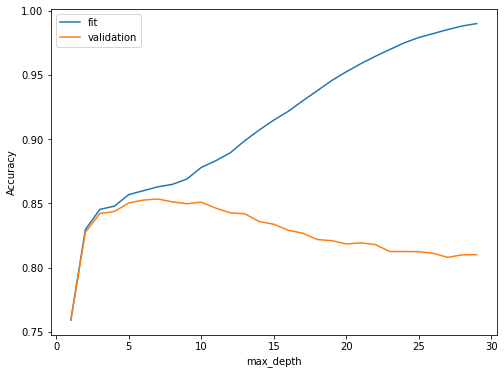

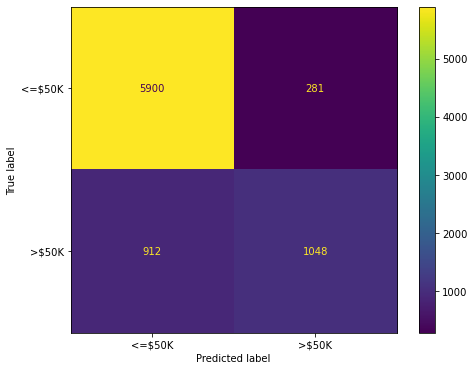

In [52]:
#simple search to define the max_depth parameter
train=[]
valid=[]
for i in range(1,30):
  dtree_model = DecisionTreeClassifier(max_depth=i, random_state=376)
  dtree_model.fit(train_X, train_y)
  train.append(dtree_model.score(train_X, train_y))
  valid.append(dtree_model.score(val_X, val_y))

for i in range(10):
  print('max_depth:', i+1, 'fit score:', train[i], 'validation score:', valid[i]) #best trade-off between fit and validation score when max_depth=6
print('')

ax=sns.lineplot(x=range(1,30), y = train, label='fit')
ax=sns.lineplot(x=range(1,30), y = valid, label='validation')
ax.set(xlabel='max_depth', ylabel='Accuracy')

dtree_model = DecisionTreeClassifier(max_depth = 7, random_state=376)
dtree_model.fit(train_X, train_y)
dtree_prediction=dtree_model.predict(val_X)
calc_performance_metrics('Decision Tree', val_y, dtree_prediction)
calc_confusion_matrix(val_y, dtree_prediction)


# Random Forest algorithm


Random Forest model with n_estimators=500.



**The Random Forest achieved:**



* 0.85 of accuracy 

* 0.63 of recall.


* 0.73 of precision.


* 0.68 of F1 score.


* The most important features for the prediction process were age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, has_asset, marital-statussimple Never-married, relationshipsimple Spouse.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=376)
rf_model.fit(train_X, train_y)
rf_prediction=rf_model.predict(val_X)
calc_performance_metrics('Random Forest', val_y, rf_prediction)
calc_confusion_matrix(val_y, rf_prediction)
plt.show()

plt.barh(features, rf_model.feature_importances_)
plt.xlabel("Random Forest feature importance")
plt.show()

# Randomized search on hyper parameters


As all models have reached similar performance scores in terms of accuracy, recall, precision and F1, a hyperparameter optimization will be applied to the Random Forest algorithm in an attempt to improve the obtained performance metrics.



To do that, the RandomizedSearchCV method is used, where one can define a set of hyperparameter ranges, and randomly sample from the set, performing Kfold cross validation with each combination of values.



After the optimization, a cross validation procedure will be performed on the optimized model to ensure the obtained scores.



**Best set of parameters: 'n_estimators' = 1240, 'min_samples_split' = 10, 'min_samples_leaf' = 2, 'max_depth' = 50**



**The optimized Random Forest achieved:**



* 0.86 of accuracy

* 0.62 of recall.


* 0.77 of precision.


* 0.69 of F1 score.


**In general, the optimized Random Forest has achieved similar results when compared to the best metrics of the other methods.**



We note that the optimization must be executed for a longer time in order to efficiently explore the solution space.



In [ ]:
def optimize_rf_params(train_X, train_y, val_X, val_y):
  ##randomized optimization with cross validation for the hyperparameters of the random forest
  ##return the optimized rf model
  rf_params = {'n_estimators': [int(i) for i in range(100, 2001, 380)], #6 values
            'max_depth': [int(i) for i in range(10, 51, 10)],
            #'max_features' = ['auto', 'log2'],
            'min_samples_split': [2, 5, 10, 15],
            'min_samples_leaf': [2, 4, 6],
            #'bootstrap' = [True, False]
            }
  random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_params, cv=4, n_iter=20)
  random_rf.fit(train_X, train_y)

  print(random_rf.best_params_)
  opt_rf_model=random_rf.best_estimator_

  opt_rf_prediction=opt_rf_model.predict(val_X)
  calc_performance_metrics('Random Forest', val_y, opt_rf_prediction)
  calc_confusion_matrix(val_y, opt_rf_prediction)
  return opt_rf_model


opt_rf_model=optimize_rf_params(train_X, train_y, val_X, val_y)

# Cross Validation: Kfold


The cross validation procedure is applied to the optimized Random Forest model in order to ensure the obtained scores.



**The optimized Random Forest through cross validation achieved on Test 1:**



* Accuracy | mean: 0.866963 | min: 0.860565 | max: 0.871146


* Recall | mean: 0.621142 | min: 0.600904 | max: 0.639062


* Precision | mean: 0.781704 | min: 0.759752 | max: 0.798710


* F1 | mean: 0.692134 | min: 0.678379 | max: 0.702870


**Such results show the predictions consistency.**



In [ ]:
def cross_validation_prediction(ml_model, X, y):
  list_metrics=[]

  kf=RepeatedKFold(n_splits=4, n_repeats=5, random_state=376)

  train_X, val_X, train_y, val_y=None, None, None, None
  for l_train, l_val in kf.split(X):
    #print(l_train.shape[0], l_val.shape[0])
    train_X, val_X = X.iloc[l_train], X.iloc[l_val]
    train_y, val_y = y.iloc[l_train], y.iloc[l_val]

    ##optimized Random Forest
    #ml_model = RandomForestClassifier(n_estimators=500, random_state=376)
    ml_model.fit(train_X, train_y)
    ml_prediction=ml_model.predict(val_X)
    acc, recall, prec, f1=calc_performance_metrics('ML model', val_y, ml_prediction)

    list_metrics.append([acc, recall, prec, f1])

    #plt.barh(features, ml_model.feature_importances_)
    #plt.xlabel("Random Forest feature importance")
    #plt.show()

    print('\n')

  print('Accuracy | mean: %f | min: %f | max: %f'  % (np.mean([list_metrics[i][0] for i in range(len(list_metrics))]), np.min([list_metrics[i][0] for i in range(len(list_metrics))]), np.max([list_metrics[i][0] for i in range(len(list_metrics))])))
  print('Recall | mean: %f | min: %f | max: %f'    % (np.mean([list_metrics[i][1] for i in range(len(list_metrics))]), np.min([list_metrics[i][1] for i in range(len(list_metrics))]), np.max([list_metrics[i][1] for i in range(len(list_metrics))])))
  print('Precision | mean: %f | min: %f | max: %f' % (np.mean([list_metrics[i][2] for i in range(len(list_metrics))]), np.min([list_metrics[i][2] for i in range(len(list_metrics))]), np.max([list_metrics[i][2] for i in range(len(list_metrics))])))
  print('F1 | mean: %f | min: %f | max: %f'        % (np.mean([list_metrics[i][3] for i in range(len(list_metrics))]), np.min([list_metrics[i][3] for i in range(len(list_metrics))]), np.max([list_metrics[i][3] for i in range(len(list_metrics))])))

  ##plotting accuracy values
  plt.hist([list_metrics[i][0] for i in range(len(list_metrics))])
  plt.show()

 sns.boxplot(y=[list_metrics[i][0] for i in range(len(list_metrics))])
  plt.show()


#cross_validation_prediction(rf_model, X, y)
cross_validation_prediction(opt_rf_model, X, y) #pass the optimized random forest

# Additional feature engineering


**Categorical features:**\ Performed operations:



1. From feature workclass: Creation of feature workclass_all_gov from the combination of 2 similar classes (Without-pay and Never-worked), and also from the grouping of gov sectors in a single class. The other classes remain the same. This feature will replace the previous created workclass_simple.



2. From feature native-country: Creation of a binary feature native-country_bin that encompasses only two classes: the class United-States which remains the same due to the large number of data, and the class Foreigner. This feature will replace the previous created feature native-country_simple which was based on the continents.



3. Transformation of categorical features to numerical features through one-hot-encoding strategy.



In [ ]:
##categorical features
def group_workclass_gov(val):
  #combination of similar classes and with few data
  if val==' Without-pay' or val==' Never-worked':            
    return ' WO_pay'
  elif val==' Local-gov' or val==' State-gov' or val==' Federal-gov':
    return ' Gov_sector'
  else:
    return val
    
def group_native_country_bin(val):
  #abstraction of classes
  if val==' United-States':       
    return val
  else:
    return ' Foreigner'

train_data['workclass_all_gov']=train_data['workclass'].map(group_workclass_gov)
train_data['native-country_bin']=train_data['native-country'].map(group_native_country_bin)
train_data=pd.get_dummies(train_data, columns=['workclass_all_gov', 'native-country_bin'], drop_first=True)

test_data['workclass_all_gov']=test_data['workclass'].map(group_workclass_gov)
test_data['native-country_bin']=test_data['native-country'].map(group_native_country_bin)
test_data=pd.get_dummies(test_data, columns=['workclass_all_gov', 'native-country_bin'], drop_first=True)

# Train Definition II


* **Test 2)** In the second set of features, the idea is to simplify even more the features, replacing the continuous features by the binning features, and also reducing the number of categories in some features by grouping the similar ones as done above.


**Differences from Test 1:**



* Replacement of feature age by feature age_quantile_binning


* Replacement of hours-per-week by hours-per-week_quantile_binning


* Replacement of workclass_simple by workclass_all_gov


* Replacement of native-country_simple by native-country_bin


In [ ]:
print(train_data.columns)

features2=['education-num', 'capital-gain', 'capital-loss', 'fnlwgt',
       'sex_ Male',
       'occupation_simple_ Craft-repair', 
       'occupation_simple_ Exec-managerial',
       'occupation_simple_ Farming-fishing',
       'occupation_simple_ Handlers-cleaners',
       'occupation_simple_ Machine-op-inspct',
       'occupation_simple_ Other-service',
       'occupation_simple_ Priv-house-serv',
       'occupation_simple_ Prof-specialty',
       'occupation_simple_ Protective-serv', 
       'occupation_simple_ Sales',
       'occupation_simple_ Tech-support',
       'occupation_simple_ Transport-moving',
       'marital-status_simple_ Never-married',
       'marital-status_simple_ No-spouse',
       'relationship_simple_ Other-relative', 
       'relationship_simple_ Own-child',
       'relationship_simple_ Spouse', 
       'relationship_simple_ Unmarried',
       'race_simple_ White', 
       'has_asset',
       'age_quantile_binning', 
       'hours-per-week_quantile_binning',
       'workclass_all_gov_ Gov_sector', 
       'workclass_all_gov_ Private',
       'workclass_all_gov_ Self-emp-inc',
       'workclass_all_gov_ Self-emp-not-inc', 
       'workclass_all_gov_ WO_pay',
       'native-country_bin_ United-States']

print(len(features2))

In [ ]:
X = train_data[features2]
y = train_data['income_ >50K']
display(X.head())
display(y.head())

##data split between train and validation
#train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, stratify=y, random_state=376)

# Optimized Random Forest and Kfold


Train and validation of Test 2 via the cross validation procedure applied to the optimized Random Forest model.



**The optimized Random Forest through cross validation achieved on Test 2:**



* Accuracy | mean: 0.861681 | min: 0.857002 | max: 0.869672


* Recall | mean: 0.607847 | min: 0.591365 | max: 0.641667


* Precision | mean: 0.769531 | min: 0.744201 | max: 0.786509


* F1 | mean: 0.679080 | min: 0.669318 | max: 0.699007


**We observe that the feature set of Test 1 has presented slightly better results. Thus, the categorizations done in Test 2 didn't show improvements.**



In [ ]:
#cross_validation_prediction(rf_model, X, y)
cross_validation_prediction(opt_rf_model, X, y)

# Train Definition III


* **Test 3)** In the third set of features, we used only the most important features pointed out in Test 1 regarding the Random Forest predictions. Some of these features were also highlighted and connected in the EDA step, such age, education and working hours per week.


**The idea in this test set is reduce the number of features but improving, or at least keeping, the same performance results.**



In [ ]:
features3=['fnlwgt', 'age', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss', 'marital-status_simple_ Never-married', 'relationship_simple_ Spouse']

X = train_data[features3]
y = train_data['income_ >50K']
display(X.head())
display(y.head())

# Optimized Random Forest and Kfold


Train and validation of Test 3 via the cross validation procedure applied to the optimized Random Forest model.



**The optimized Random Forest through cross validation achieved on Test 3:**



* Accuracy | mean: 0.856866 | min: 0.850491 | max: 0.862548


* Recall | mean: 0.602194 | min: 0.584402 | max: 0.623541


* Precision | mean: 0.754018 | min: 0.721059 | max: 0.774026


* F1 | mean: 0.669504 | min: 0.657431 | max: 0.686176


**The obtained results follow the previous tests in terms of accuracy but using fewer features.**



In [ ]:
#cross_validation_prediction(rf_model, X, y)
cross_validation_prediction(opt_rf_model, X, y)

# Test step


Last prediction task over the test dataset using the feature set from Test 1 that obtained the best results, the optimized Random Forest and cross validation to evaluate the results.

**The optimized Random Forest through cross validation achieved on the test dataset:**



* Accuracy | mean: 0.856761 | min: 0.850983 | max: 0.862425


* Recall | mean: 0.601938 | min: 0.582863 | max: 0.624556


* Precision | mean: 0.753766 | min: 0.722565 | max: 0.775391


* F1 | mean: 0.669238 | min: 0.655496 | max: 0.687117


We observe that the performance metrics of the model in both training and testing steps have followed similar results, which shows that our model could reach a reasonable trade-off between bias and variance.

However, it's noted that further investigations regarding hyper parameter optimization (reaching the full potential of the algorithm) and also feature engineering (finding more elusive patterns) are needed to increase the method's performance.

In [ ]:
X_test = test_data[features]
y_test = test_data['income_ >50K.']
display(X_test.head())
display(X_test.head())

#cross_validation_prediction(rf_model, X, y)
cross_validation_prediction(opt_rf_model, X, y)

# Final remarks


To conclude the project, we can state that it is possible to determine whether a person makes over $ 50K  year based on census data, with a reasonable accuracy of =86%  in the testing step. However, there are features that are more relevant than others, such as age, working hours-per-week, education level, and these should be better considered in order to increase the accuracy of the models.

Furthermore, as already mentioned, it is necessary that more specialized adjustments are done to improve the predictions' quality. For instance, it is possible to carry out further investigations on feature engineering and selection to better understand the target's behavior, and also focus on optimization of models' hyper parameters in order to extract the full potential of them.